In [1]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing dataset
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [3]:
#summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [4]:
# df.drop(columns=['Sexual Activity'], inplace=True)

In [5]:
# unique values in each columns
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Sexual Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [6]:
# merging same values in 'Suicidal thoughts' column
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_14260\1254054704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


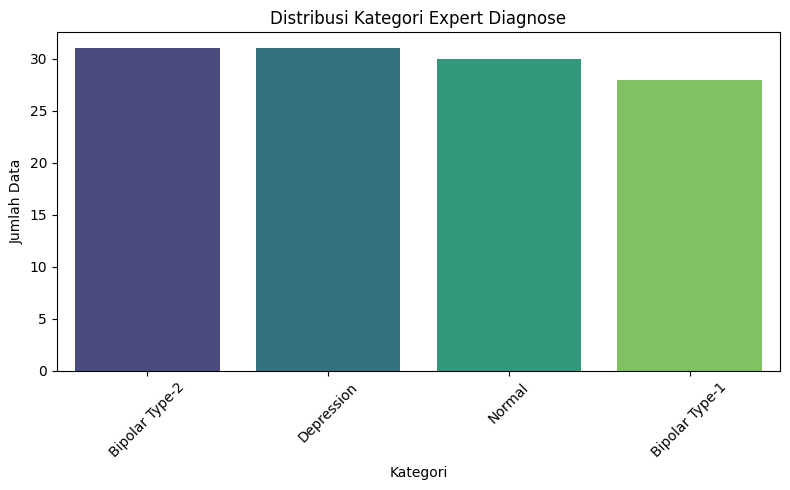

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misal df adalah DataFrame kamu
plt.figure(figsize=(8,5))

# Hitung frekuensi tiap kategori
counts = df['Expert Diagnose'].value_counts()

# Barplot
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.title('Distribusi Kategori Expert Diagnose')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
manual_encoders = {
    "Sadness": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Euphoric": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Exhausted": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Sleep dissorder": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Mood Swing": {
        "NO": 0,
        "YES": 1
    },
    "Suicidal thoughts": {
        "NO": 0,
        "YES": 1,
        "YES ": 1  # extra space fix
    },
    "Anorxia": {
        "NO": 0,
        "YES": 1
    },
    "Authority Respect": {
        "NO": 0,
        "YES": 1
    },
    "Try-Explanation": {
        "NO": 0,
        "YES": 1
    },
    "Aggressive Response": {
        "NO": 0,
        "YES": 1
    },
    "Ignore & Move-On": {
        "NO": 0,
        "YES": 1
    },
    "Nervous Break-down": {
        "NO": 0,
        "YES": 1
    },
    "Admit Mistakes": {
        "NO": 0,
        "YES": 1
    },
    "Overthinking": {
        "NO": 0,
        "YES": 1
    },
    "Sexual Activity": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Concentration": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7
    },
    "Optimisim": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Expert Diagnose": {
        "Normal": 0,
        "Depression": 1,
        "Bipolar Type-1": 2,
        "Bipolar Type-2": 3
    }
}

manual_decoders = {
    feature: {v: k for k, v in mapping.items()}
    for feature, mapping in manual_encoders.items()
}



In [9]:
input_data = {
    "Sadness": "Usually",
    "Euphoric": "Seldom",
    "Exhausted": "Sometimes",
    "Sleep dissorder": "Usually",
    "Mood Swing": "YES",
    "Suicidal thoughts": "NO",
    "Anorxia": "NO",
    "Authority Respect": "YES",
    "Try-Explanation": "YES",
    "Aggressive Response": "NO",
    "Ignore & Move-On": "YES",
    "Nervous Break-down": "NO",
    "Admit Mistakes": "YES",
    "Overthinking": "YES",
    "Sexual Activity": "3 From 10",
    "Concentration": "5 From 10",
    "Optimisim": "7 From 10"
}

def manual_encode_df(df, manual_encoders):
    df_encoded = df.copy()
    for col, mapping in manual_encoders.items():
        if col in df_encoded.columns:
            # Fungsi untuk map value ke angka sesuai manual_encoders
            df_encoded[col] = df_encoded[col].map(mapping)
            # Jika ada nilai yang tidak ditemukan di mapping, akan jadi NaN
            if df_encoded[col].isnull().any():
                missing = df_encoded[col][df_encoded[col].isnull()].unique()
                raise ValueError(f"Found unmapped values in column '{col}': {missing}")
        else:
            print(f"Warning: Column '{col}' tidak ada di dataframe.")
    return df_encoded

# Gunakan fungsi:
df_encoded = manual_encode_df(df, manual_encoders)

In [10]:
df_encoded

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,1,3,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,3
Patiant-02,1,3,1,2,0,1,0,0,0,0,0,0,0,0,3,1,4,1
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,2
Patiant-04,1,3,1,0,1,1,1,0,1,0,0,0,0,0,2,1,1,3
Patiant-05,1,1,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,3,1,2,0,1,0,0,1,0,1,0,0,1,1,4,2,1
Patiant-117,2,2,2,3,1,0,0,0,0,1,0,0,0,1,5,6,7,2
Patiant-118,1,2,1,2,1,0,1,1,0,0,0,1,0,1,0,4,2,3


In [11]:

# Pisahkan fitur dan label
X = df_encoded.drop('Expert Diagnose', axis=1)
y = df_encoded['Expert Diagnose']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Tampilkan importance
importances = model.feature_importances_
importance_df_encoded = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df_encoded)

                Feature  Importance
4            Mood Swing    0.277323
16            Optimisim    0.132414
14      Sexual Activity    0.096016
0               Sadness    0.080526
5     Suicidal thoughts    0.057457
1              Euphoric    0.055672
15        Concentration    0.052503
2             Exhausted    0.048725
3       Sleep dissorder    0.039505
7     Authority Respect    0.028977
9   Aggressive Response    0.024792
11   Nervous Break-down    0.024100
13         Overthinking    0.020389
6               Anorxia    0.018956
10     Ignore & Move-On    0.014570
12       Admit Mistakes    0.014194
8       Try-Explanation    0.013881


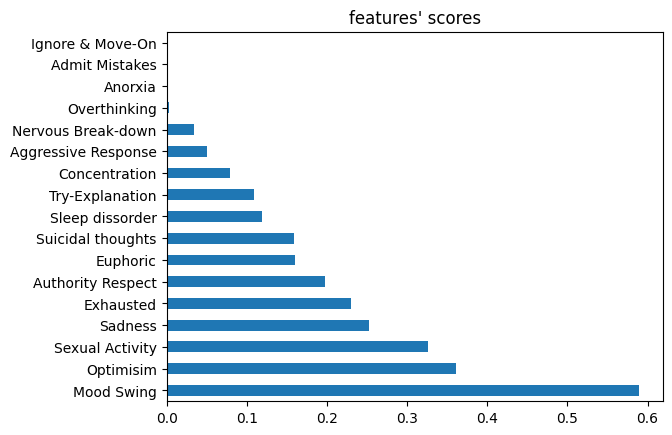

Sadness                0.253027
Euphoric               0.159931
Exhausted              0.229913
Sleep dissorder        0.118475
Mood Swing             0.589290
Suicidal thoughts      0.159436
Anorxia                0.000000
Authority Respect      0.197063
Try-Explanation        0.109300
Aggressive Response    0.050134
Ignore & Move-On       0.000000
Nervous Break-down     0.033773
Admit Mistakes         0.000000
Overthinking           0.002604
Sexual Activity        0.326618
Concentration          0.079577
Optimisim              0.361017
dtype: float64


In [12]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import pandas as pd

X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

mi_scores = mutual_info_classif(X, y, random_state=42)

feature_selection = SelectKBest(score_func=lambda X, y: mi_scores)
feature_selection.fit(X, y)

features_scores = pd.Series(mi_scores, index=X.columns)
features_scores.nlargest(18).plot(kind='barh', title="features' scores")
plt.show()

print(features_scores)


In [13]:
df_encoded.drop(columns=['Admit Mistakes', 'Ignore & Move-On', 'Anorxia'], inplace=True)

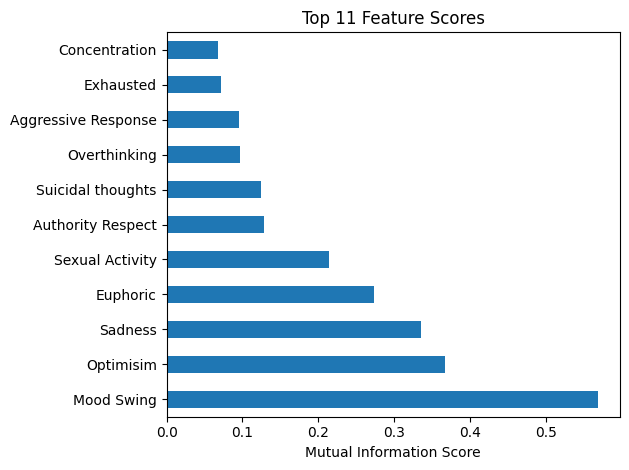

Top 11 features:
 Mood Swing             0.568913
Optimisim              0.366509
Sadness                0.334602
Euphoric               0.273705
Sexual Activity        0.214197
Authority Respect      0.128833
Suicidal thoughts      0.124792
Overthinking           0.096753
Aggressive Response    0.095400
Exhausted              0.071578
Concentration          0.068084
dtype: float64


In [14]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya df_encoded sudah terdefinisi sebelumnya
X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

# Hitung mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Buat Series dari skor dan ambil 11 terbesar
features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)

# Visualisasi
top_11_features.plot(kind='barh', title="Top 11 Feature Scores")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()

# Cetak nama fitur terbaik
print("Top 11 features:\n", top_11_features)

# Ambil data dengan 11 fitur terbaik
X_top11 = X[top_11_features.index]


In [15]:
X = df_encoded.drop(columns=[df_encoded.columns[-1]])  # semua fitur kecuali target
y = df_encoded[df_encoded.columns[-1]]                  # target

x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2,
    shuffle=True,
    stratify=y  # optional, kalau mau jaga proporsi kelas
)


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Cek distribusi kelas setelah oversampling
from collections import Counter
print("Distribusi sebelum oversampling:", Counter(y_train))
print("Distribusi sesudah oversampling :", Counter(y_train_resampled))


Distribusi sebelum oversampling: Counter({3: 22, 1: 22, 0: 21, 2: 19})
Distribusi sesudah oversampling : Counter({3: 22, 2: 22, 0: 22, 1: 22})


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
# --- Normalisasi fitur ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [19]:
input_dim = x_train_scaled.shape[1]
output_dim = len(y_train.unique())

model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(output_dim, activation='softmax')
])

d:\DBS\Project Capstone\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [22]:
# --- Training ---
history = model.fit(
    x_train_scaled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.3504 - loss: 1.3993 - val_accuracy: 0.6111 - val_loss: 1.2339
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3537 - loss: 1.3102 - val_accuracy: 0.6667 - val_loss: 1.1809
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5670 - loss: 1.1784 - val_accuracy: 0.6667 - val_loss: 1.1366
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4662 - loss: 1.1416 - val_accuracy: 0.6667 - val_loss: 1.0986
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5852 - loss: 1.1377 - val_accuracy: 0.6667 - val_loss: 1.0651
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6125 - loss: 1.0575 - val_accuracy: 0.6667 - val_loss: 1.0363
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5943 - loss: 1.0404 - val_accuracy: 0.6111 - val_loss: 1.0136
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6261 - loss: 1.0293 - val_accuracy: 0.6111 - val_loss: 0.9952

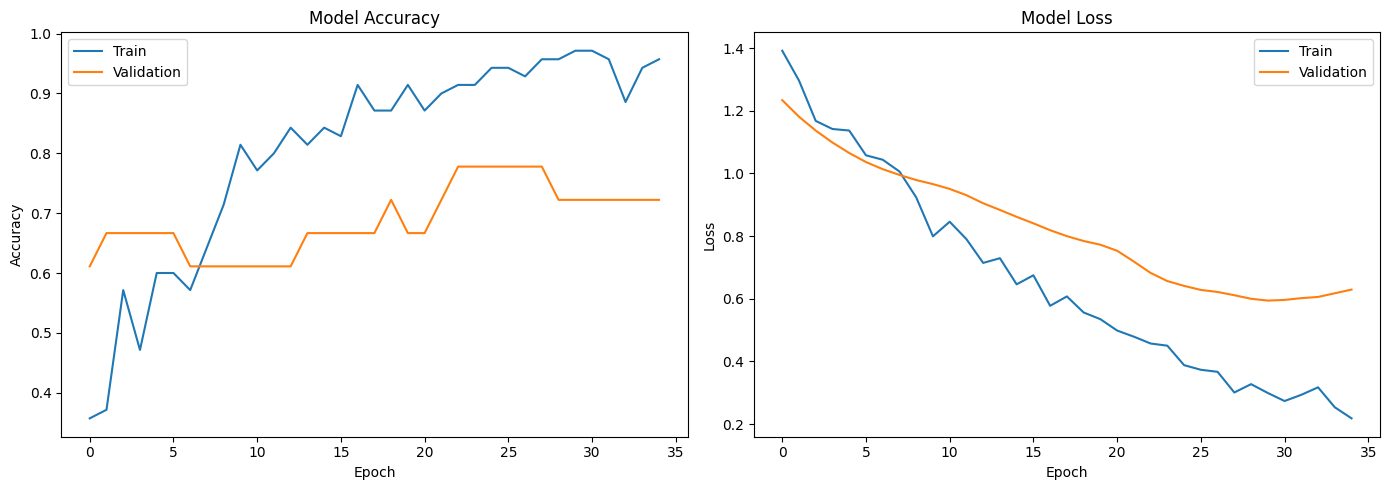

In [23]:
# --- Visualisasi akurasi & loss ---
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# --- Evaluasi pada training set ---
train_loss, train_acc = model.evaluate(x_train_scaled, y_train_resampled, verbose=0)
print(f"\n📊 Training Set - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

# --- Evaluasi pada test set ---
test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"📊 Test Set     - Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")


📊 Training Set - Loss: 0.2865, Accuracy: 0.9318
📊 Test Set     - Loss: 0.3984, Accuracy: 0.8611


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

🧾 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.82      1.00      0.90         9
           2       0.80      0.89      0.84         9
           3       1.00      0.89      0.94         9

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36



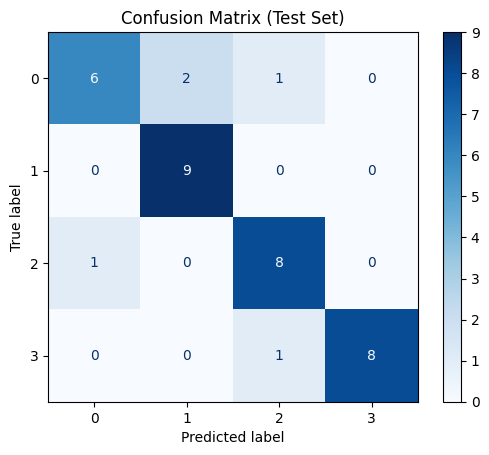

In [25]:
# --- Confusion Matrix & Classification Report ---
y_pred = model.predict(x_test_scaled)
y_pred_classes = tf.argmax(y_pred, axis=1)

print("\n🧾 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [26]:
df_encoded

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Authority Respect,Try-Explanation,Aggressive Response,Nervous Break-down,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,
Patiant-01,1,3,2,2,1,1,0,1,0,1,1,2,2,3,3
Patiant-02,1,3,1,2,0,1,0,0,0,0,0,3,1,4,1
Patiant-03,2,0,2,2,1,0,0,1,1,1,0,5,4,6,2
Patiant-04,1,3,1,0,1,1,0,1,0,0,0,2,1,1,3
Patiant-05,1,1,2,2,0,0,0,0,0,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,3,1,2,0,1,0,1,0,0,1,1,4,2,1
Patiant-117,2,2,2,3,1,0,0,0,1,0,1,5,6,7,2
Patiant-118,1,2,1,2,1,0,1,0,0,1,1,0,4,2,3
